# Mission: Predict heart attack risk using a rich dataset with varied features.
Data Source: Data collected from [source details here].
The dataset contains columns such as Age, Cholesterol, Heart rate, Diabetes, Family History,
Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems,
Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides,
Physical Activity Days Per Week, Sleep Hours Per Day, Heart Attack Risk (Binary), Blood sugar,
CK-MB, Troponin, Heart Attack Risk (Text), Gender, Systolic and Diastolic blood pressure.
(Adjust the file path and cleaning steps based on your actual data format.)

# Import necessary libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import joblib

Load and Explore the Dataset

In [43]:
# Load dataset
df = pd.read_csv("heart_attack_prediction_dataset.csv")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:
  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Phys

Data Preprocessing


In [44]:
# Drop unnecessary columns
df = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere", "Sex", "Diet", "Income"], errors="ignore")

# Convert 'Blood Pressure' to two separate columns (Systolic and Diastolic)
if "Blood Pressure" in df.columns:
    df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
    df = df.drop(columns=["Blood Pressure"])

# Fill missing values for numeric columns with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Define Features (X) and Target Variable (y)
X = df[["Age", "Cholesterol", "Systolic BP", "Diastolic BP", "Heart Rate", "Diabetes"]]
y = df["Heart Attack Risk"]

# Split Data into Training & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Show the updated DataFrame for confirmation
print("\nUpdated DataFrame after preprocessing:")
print(df.head())



Training set size: (7010, 6)
Test set size: (1753, 6)

Updated DataFrame after preprocessing:
   Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
0   67          208          72         0               0        1        0   
1   21          389          98         1               1        1        1   
2   21          324          72         1               0        0        0   
3   84          383          73         1               1        1        0   
4   66          318          93         1               1        1        1   

   Alcohol Consumption  Exercise Hours Per Week  Previous Heart Problems  \
0                    0                 4.168189                        0   
1                    1                 1.813242                        1   
2                    0                 2.078353                        1   
3                    1                 9.828130                        1   
4                    0                 5.804299   

Data Visualization

4.1 Correlation Heatmap

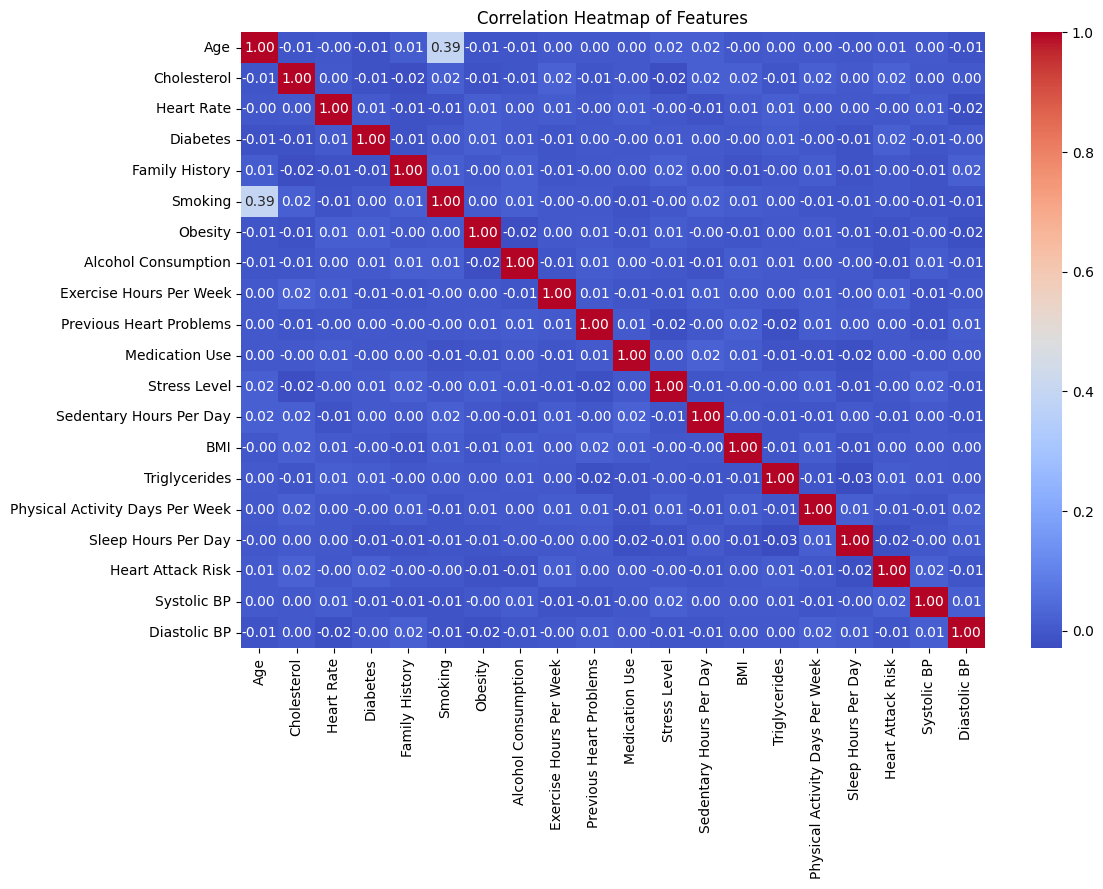

In [27]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

4.2 Feature Distributions

4.2.1 Histograms for Numerical Features

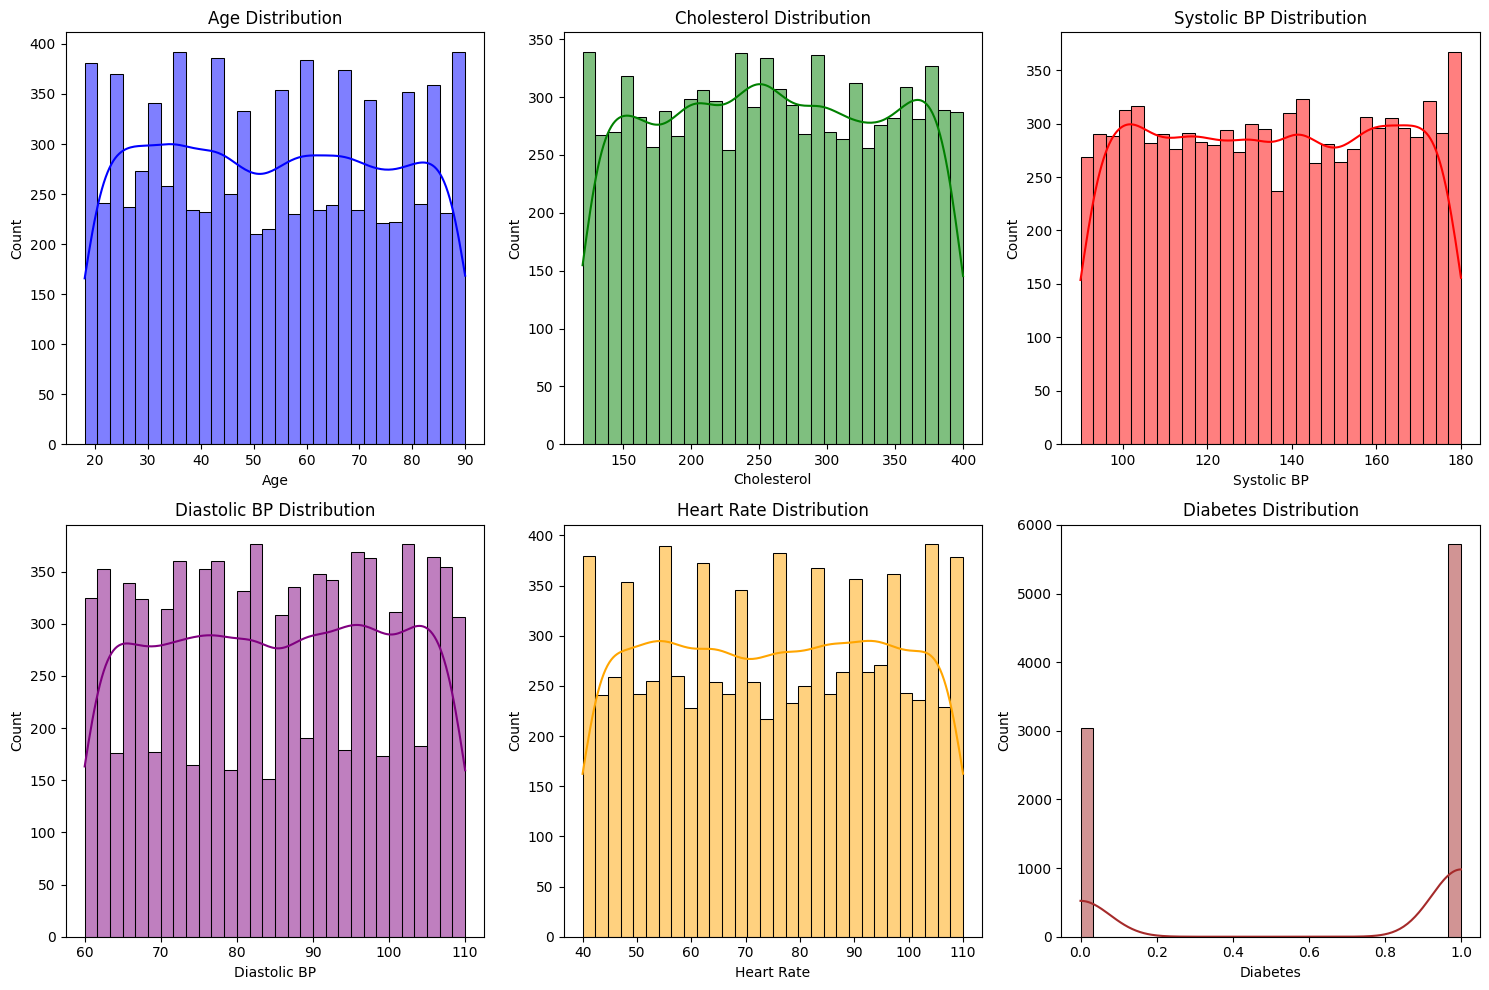

In [33]:
# Histograms for Numerical Features
plt.figure(figsize=(15, 10))

# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')

# Cholesterol Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['Cholesterol'], bins=30, kde=True, color='green')
plt.title('Cholesterol Distribution')

# Systolic BP Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Systolic BP'], bins=30, kde=True, color='red')
plt.title('Systolic BP Distribution')

# Diastolic BP Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['Diastolic BP'], bins=30, kde=True, color='purple')
plt.title('Diastolic BP Distribution')

# Heart Rate Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['Heart Rate'], bins=30, kde=True, color='orange')
plt.title('Heart Rate Distribution')

# Diabetes Distribution
plt.subplot(2, 3, 6)
sns.histplot(df['Diabetes'], bins=30, kde=True, color='brown')
plt.title('Diabetes Distribution')

plt.tight_layout()
plt.show()

4.2.2 Scatterplots for Feature Relationships

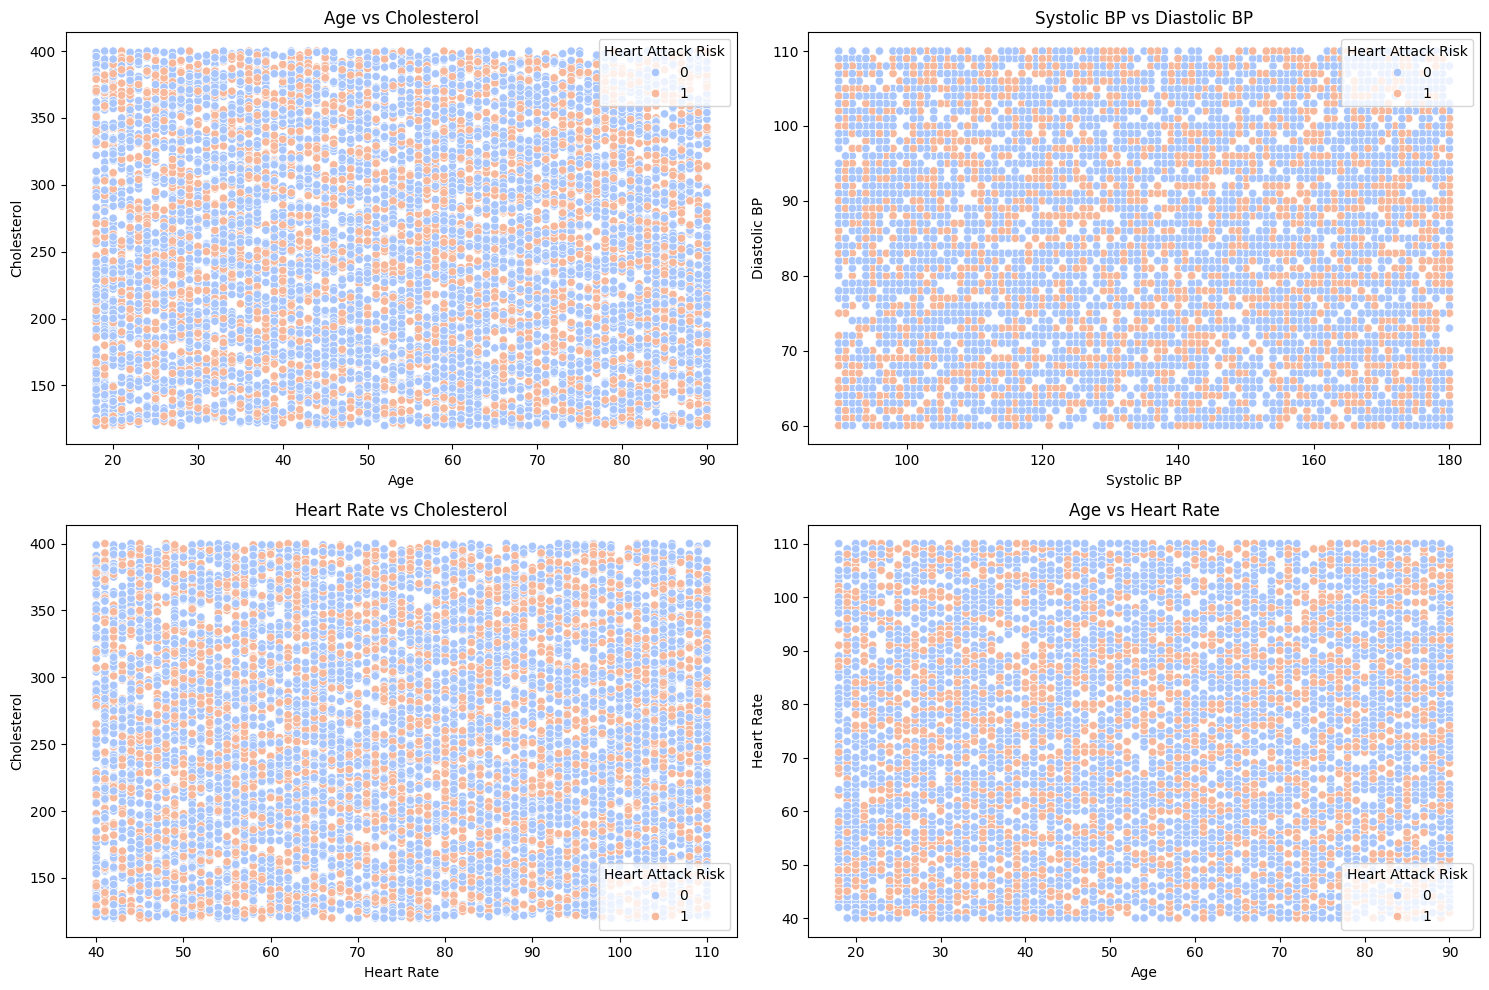

In [34]:
# Scatterplots for Feature Relationships
plt.figure(figsize=(15, 10))

# Age vs Cholesterol
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Age'], y=df['Cholesterol'], hue=df['Heart Attack Risk'], palette='coolwarm')
plt.title('Age vs Cholesterol')

# Systolic BP vs Diastolic BP
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['Systolic BP'], y=df['Diastolic BP'], hue=df['Heart Attack Risk'], palette='coolwarm')
plt.title('Systolic BP vs Diastolic BP')

# Heart Rate vs Cholesterol
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Heart Rate'], y=df['Cholesterol'], hue=df['Heart Attack Risk'], palette='coolwarm')
plt.title('Heart Rate vs Cholesterol')

# Age vs Heart Rate
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Age'], y=df['Heart Rate'], hue=df['Heart Attack Risk'], palette='coolwarm')
plt.title('Age vs Heart Rate')

plt.tight_layout()
plt.show()

Linear Regression - MSE: 0.5559, R2: 0.5758
Decision Tree - MSE: 0.4952, R2: 0.6221
Random Forest - MSE: 0.2554, R2: 0.8051


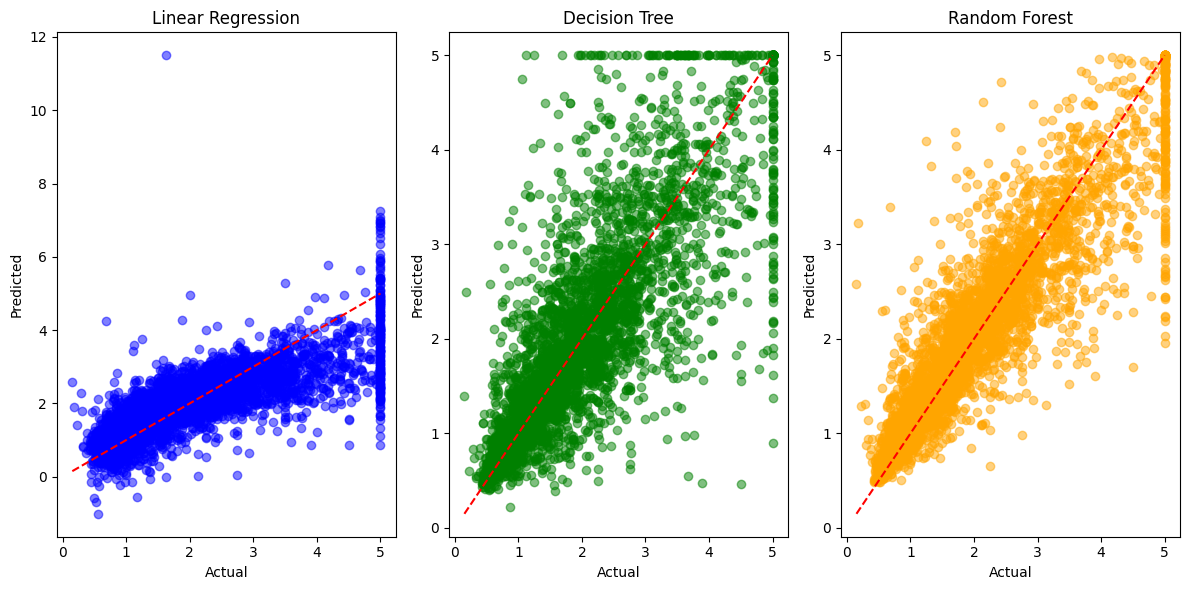

In [42]:

# Example dataset (replace with your dataset)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_forest, "Random Forest")

# Plotting results
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_forest, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

Model Training

5.1 Linear Regression Model

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")

Linear Regression MSE: 0.2297521782332272


5.2 Random Forest Model

In [36]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

Random Forest MSE: 0.2436059326868226


5.3 Decision Tree Model

In [37]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")

Decision Tree MSE: 0.45636052481460354


Step 6: Save the Model with the Least Loss

In [38]:
if mse_linear < mse_rf and mse_linear < mse_dt:
    joblib.dump(linear_model, 'best_model.pkl')
    print("Linear Regression model saved as best_model.pkl")
elif mse_rf < mse_linear and mse_rf < mse_dt:
    joblib.dump(rf_model, 'best_model.pkl')
    print("Random Forest model saved as best_model.pkl")
else:
    joblib.dump(dt_model, 'best_model.pkl')
    print("Decision Tree model saved as best_model.pkl")

Linear Regression model saved as best_model.pkl


In [39]:
# Make prediction on one data point in the test dataset
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = linear_model.predict(sample_data)
print(f"Prediction for sample data: {prediction}")

Prediction for sample data: [0.35858862]


c:\Users\Djafari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Step 8: Scatter Plot of Linear Regression Predictions

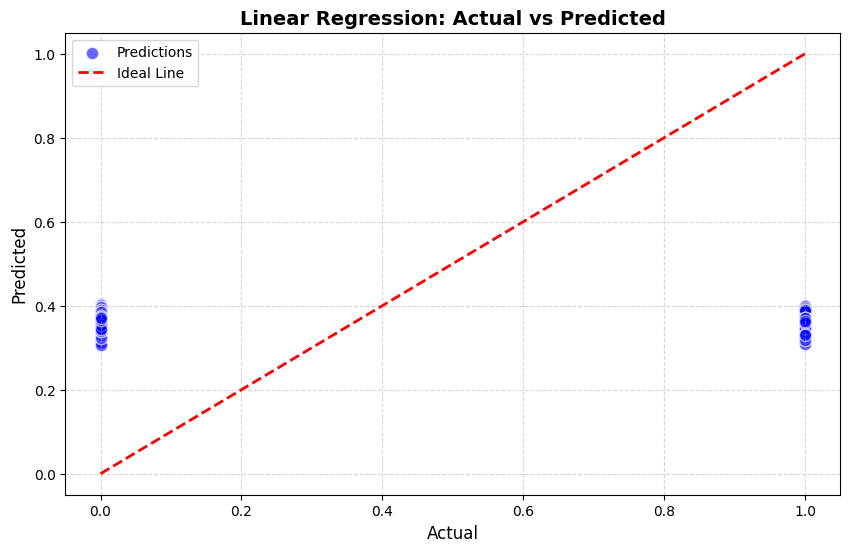

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, c='blue', alpha=0.6, edgecolors='w', s=80, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Line')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()